# Probability
## Continuous random variables in Python

This assignment is intendent for peer review grading. You have to send it to the automatic grading to check that everything compiles, but the actual checking of correctness is done in peer review. After you ready, download the Notebook file and submit it to the corresponding Peer Review course element.

### CDF of uniform distribution
Distributions in `scipy.stats` like `scipy.stats.uniform` has a bunch of useful methods. For example, instead of PDF, you can find values of CDF function using `.cdf` method. Draw the graph of CDF for the uniform random variable on the segment \([1, 4]\). The graph should be drawn over segment \([0, 5]\).

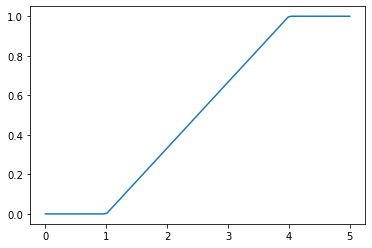

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

x = np.linspace(0, 5, 100)
y = [stats.uniform.cdf(i, 1, 3) for i in x]

plt.plot(x,y)
plt.show()

**Peer review grading.** Output of the cell above should be similar to output of the cell below.

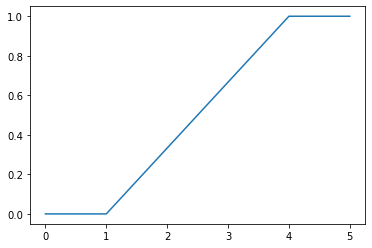

In [2]:
plt.plot([0, 1, 4, 5], [0, 0, 1, 1])

### Study normal distribution
Let us repeat the study from video *Generating and visualizing continuous random variables*, but instead of uniform distribution study standard normal distribution. Generate large sample from standard normal distribution (you can use `numpy.random.normal`, use parameter `size` to specify the number of elements in the sample). Plot the histogram of your sample (with option `density=True`) and the graph of PDF on the same picture. To find PDF, use the '.pdf()` method of `scipy.stats.norm` object. You histogram should match the graph of PDF, and the graph of PDF should be similar to the bell curve from the video _Examples of probability density functions_.


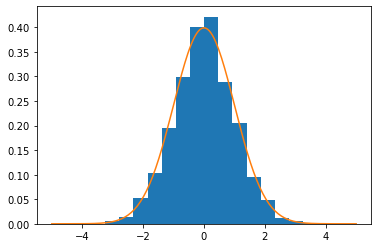

In [3]:
mu, sigma = 0, 1 # mean and standard deviation

x = np.linspace(-5, 5, 200)
x1 = np.random.normal(mu, sigma, 2000)

y = [stats.norm().pdf(i) for i in x]
plt.hist(x1, 15, density=True)
plt.plot(x, y)
plt.show()

**Peer review grading.** The output of the cell above should be similar to the output of the cell below.

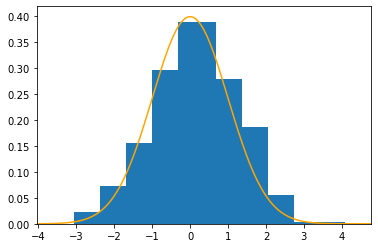

In [4]:
# some magic to draw picture similar to correct

hist = np.array([0.02342135, 0.07319173, 0.15516646, 0.29569458, 0.38937999,
       0.27812856, 0.18737082, 0.05562571, 0.00292767, 0.00292767])
bin_edges = np.array([-3.05023337, -2.36709606, -1.68395875, -1.00082143, -0.31768412,
        0.36545319,  1.04859051,  1.73172782,  2.41486513,  3.09800245,
        3.78113976])
x = np.linspace(-5, 5, 200)
plt.bar(bin_edges[:-1] + 0.5, hist, width = 1)
plt.xlim(min(bin_edges)-1, max(bin_edges)+1)
plt.plot(x, 1/np.sqrt(2 * np.pi)*np.exp(-x**2/2), color='orange')

### Acceptance-rejection algorithm
Assume that we need to generate random variable with the given PDF. One way to do it is the acceptance-rejection algorithm. Denote the desired PDF by $f$. Assume it is non-zero only on some segment $[a, b]$. Let $M$ be upper bound for $f$ on $[a, b]$ (i.e. $f(x) \le M$ for all $x \in [a, b]$). The algorithm works as follows. We generate so-called *proposal*: random number $x_{p} \in [a, b]$ from uniform distribution on $[a, b]$. Then we independently generate a random number $y \in [0, M]$ from uniform distribution on $[0, M]$. If $y ≤ f(x_p)$, then we _accept_ proposal $x_p$: put $x=x_p$ and return it. Otherwise, we _reject_ $x_p$ and generate a new pair $(x_p, y)$. This process is continued until condition $y ≤ f(x_p)$ is satisfied.

Now, for any point $x_0$, the probability to get a point near $x_0$ from our algorithm is proportional to probability that pair $(x, y)$ is accepted while $x$ is near $x_0$. This probability is in turn proportional to value of $f(x)$. If $f(x)$ is small, it is less likely that $y \le f(x)$ and point is accepted, and vice versa. Now if $f$ is continuous and $x$ is close to $x_0$, $f(x)$ is close to $f(x_0)$. So the probability to get a point $x$ that is close to $x_0$ is (approximately) proportional to $f(x_0)$. It follows that the marginal probability density function of $x$ is proportional to $f$, i.e. $\mathop{\mathrm{pdf}}(x)=\alpha f(x)$ for some constant $\alpha$. However, due to condition $\int_a^b pdf(x)\, dx=1$, constant $\alpha$ is determined uniquely: if $f$ is itself PDF, then $\int_a^b f(x)\, dx=1$ and $\alpha$ should be equal to 1. Note that to use this algorithm we don't need to know actual desired PDF: it is sufficient to know any function that is proportional to PDF. (In this case $\alpha$ will be different from 1.) This is important property in problems of Bayesian inference, when we usually know PDF only up to multiplication by some constant.

In this problem, you have to implement the function `accept_reject(f, a, b, M, return_y = False)` that generates a random number with the acceptance-rejection algorithm. Here `f` is a function that is proportional to the desired PDF, `a`, `b` and `M` are as in the description above. If `return_y` is `True`, we have to return tuple `(x, y)`, otherwise, just return `x`.

After your function is implemented, you can test how it works by visual inspection of distributions of large samples.

In [5]:
from numpy.random import uniform

def accept_reject(f, a, b, M, return_y=False): 
    x = uniform(a, b)
    y = uniform(0, M)
    while y > f(x):
        x = uniform(a, b)
        y = uniform(0, M)
    if return_y:
        return (x, y)
    else:
        return x
    

Let's try it:

In [6]:
print(accept_reject(lambda x: 2 * x, 0, 1, 1)) # should get one number
print(accept_reject(lambda x: 2 * x, 0, 1, 1, return_y=True)) # should get a pair

0.8902456968524839
(0.5375484348583237, 0.998199966672927)


To investigate the joint distribution of $(x, y)$, let's generate a sample with option `return_y=True` and draw a scatter plot.

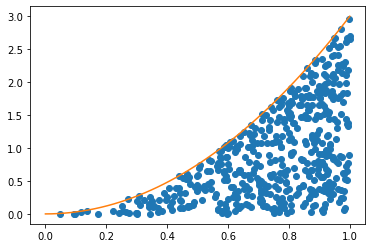

In [7]:
import numpy as np
import matplotlib.pyplot as plt

a = 0
b = 1
M = 3

def f(x):
    return 3  * x**2
    # coefficient 3  is due to condition that integral over [a, b] should be equal to 1
    # to plot nice picture
    
size = 500

samples = [accept_reject(f, a, b, M, return_y=True) for _ in range(size)]
plt.plot([x for x, y in samples],
         [y for x, y in samples], 'o')
xrng = np.linspace(a, b)
plt.plot(xrng, f(xrng))

**Peer review grading.** The output of the cell above should be similar to the output of the cell below.

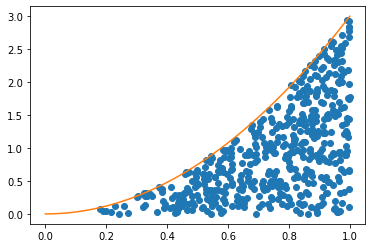

In [8]:
samples_ref = [(0.4398538727460978, 0.20494715386796336), (0.18975829676356615, 0.03831029199662406), (0.834579089270032, 0.16533868212530367), (0.8073326280583147, 1.6380936864996718), (0.8667993772007975, 0.8314626484406995), (0.384031661323435, 0.3803354834242346), (0.9740760107785972, 2.3200504394190844), (0.582431412995607, 0.042113998371568595), (0.7441727875259607, 1.3909673360891706), (0.8164016771173198, 1.158294258333008), (0.48245798020048825, 0.05938547595720767), (0.8014741815692614, 0.9086528166666767), (0.7648953380115993, 1.1683695279252664), (0.8986116129637463, 2.397896132803826), (0.9387005374266169, 2.5416802071949105), (0.9502204163021277, 1.4889371713462567), (0.9052973696724878, 1.704435068754667), (0.8398578434870526, 0.2770339851167466), (0.9292824819997025, 1.4544630663051947), (0.9158267662738313, 1.076305440355589), (0.9023423855306655, 0.9422507693360607), (0.9560256275951167, 1.5518364939460376), (0.9392198085637573, 0.8854006744529392), (0.913048899986564, 0.40695961476006925), (0.6397020851892903, 0.5117892049683044), (0.4611575739317123, 0.3361543155064911), (0.5804839402191528, 0.344587964832167), (0.2288408080626012, 0.12368636432502689), (0.8009100133979045, 0.7178755618136347), (0.962095363024554, 0.03300127872424685), (0.5579971418174644, 0.35991576236787426), (0.3849212061293654, 0.19965435169718826), (0.8405993360314351, 0.9426388882399833), (0.5160756103373929, 0.09644519708299926), (0.7960761020202216, 0.24957201114139171), (0.8461347033967749, 0.9695347082017588), (0.8915144627558149, 0.020497445501830747), (0.5620576869615386, 0.26411197995453495), (0.7506986984080054, 0.6037638220018712), (0.5303715438680574, 0.5240783191489854), (0.5801555276543607, 0.6947003630225418), (0.7136108630700656, 0.3917122162592803), (0.9223012368984238, 0.7963516558356608), (0.9271008030785427, 0.48725809031731604), (0.9891475101071975, 1.0380403259543636), (0.8699599103632202, 0.9891144128921824), (0.8759444267602264, 1.3710770553752294), (0.7913939661452565, 0.8984732187023124), (0.8032448972588276, 0.6769319553966089), (0.8080482002239038, 1.032318294862663), (0.6940060717765649, 0.8219229067963795), (0.960224639125392, 1.522193434040469), (0.326700012205587, 0.27133209253496227), (0.5481229985312035, 0.22593392355420117), (0.9667521482861429, 0.8233506436356947), (0.9469752472357678, 0.07161894932798785), (0.466254893843814, 0.3925735343788025), (0.96155616799286, 2.0082205476041284), (0.8816948811247568, 2.2297345598207765), (0.8520229238077873, 1.0971450954486222), (0.7187626486914697, 0.386717156737615), (0.29959399072541404, 0.2550402799836181), (0.6645013832391266, 0.5649416098271159), (0.8058874079300944, 1.6112893564767226), (0.9167646604497763, 1.4364035070326042), (0.611596164499924, 0.11909116020204491), (0.9975769320099248, 2.6906469432815676), (0.6751180993210479, 1.281782972027016), (0.49819299716685017, 0.462444303404559), (0.9585570348402729, 2.418785139288539), (0.8071509089742367, 0.14730924226858688), (0.862464313692018, 0.4623113103892925), (0.7066279432170303, 1.3879909213183894), (0.668244331828682, 0.9538166483595012), (0.6096615016574531, 0.6706027918432687), (0.8917946596743528, 0.025025286270487723), (0.7352549391896478, 0.6520879813665373), (0.461876567012644, 0.6286549383155026), (0.6425056970187806, 0.5933706370174046), (0.9104817361404195, 1.2276371501586096), (0.8713089339481981, 1.4348646037393873), (0.5948504316206941, 0.4285113141469581), (0.8884787793486448, 1.8147340269445698), (0.9669577117289311, 0.9129961051721485), (0.7807288273930352, 1.0375687910335007), (0.9133862192614773, 2.2361391748300044), (0.9654397729782975, 1.7014624372500786), (0.48229787784410005, 0.5000800571983871), (0.7422574195033957, 0.49924880692614526), (0.6526047127145492, 0.16982890768372239), (0.4141328200122846, 0.41571787386738734), (0.49902796764624924, 0.2863722518483903), (0.7246130912886162, 0.39443907826589175), (0.6853744561238165, 0.5021908326091316), (0.9314715706849873, 2.133374512675055), (0.8733506248831177, 0.11105000060189829), (0.8472905473729679, 1.4770598638217403), (0.6704346233198697, 0.6291079926293011), (0.9969322191782813, 0.37564827895561026), (0.4520966218855961, 0.1985798828273011), (0.833865105148736, 1.8422878094255484), (0.6877855599589328, 1.1603052489742232), (0.5819510449947569, 0.9767994496913374), (0.4718293288127634, 0.6415443589354701), (0.813595946920627, 0.9368552735475284), (0.3903343629563687, 0.08908404974197814), (0.5670604030163245, 0.7352105949359329), (0.9976497001154493, 1.9681388286344639), (0.940132810099177, 1.648800560798965), (0.4531556595361571, 0.23242768276709103), (0.5023611944411972, 0.44651065206723906), (0.869194182517753, 0.9438750465636321), (0.8816525007497624, 1.1576373988542452), (0.744208080081558, 0.21894226431308017), (0.9204775311116254, 0.31536275059795704), (0.4254094507089313, 0.019221757935421246), (0.3262589194748984, 0.14150985250690507), (0.5246343279372517, 0.7053253826006479), (0.7113529449245736, 0.14639220838279643), (0.6348275831368885, 0.37750710340306315), (0.7212587243052229, 0.38489792262089084), (0.89180807624935, 1.8509159381762141), (0.4723924478755366, 0.34486805845771085), (0.9794324592414413, 0.6419236568613628), (0.4973591605689279, 0.6733943531519316), (0.9490830205571787, 1.5072709624936587), (0.8534761292385079, 1.3506386478222556), (0.516476821486455, 0.09827601367956862), (0.5217437946658637, 0.45132597922242723), (0.3427291239054161, 0.2996372049157765), (0.8633602024676469, 0.0013800954917398967), (0.6143514073751957, 0.6834462530108284), (0.8540843706336557, 0.5917835529357826), (0.6042960910714844, 0.8445074327727099), (0.6595877554659789, 0.6534576080373664), (0.8491989121588835, 0.14813281176266524), (0.8476599138684527, 1.6841695024487118), (0.448174889090755, 0.12028526557056751), (0.9065782537911447, 0.1341198887091145), (0.8538490467244085, 2.170784679192836), (0.9617480847314892, 2.311749062722029), (0.9497423329447665, 2.3393467927932785), (0.6571109021560397, 0.8996257531105839), (0.8766149662264593, 0.8757571365937891), (0.9552174226910484, 2.481243833051889), (0.9946611189004846, 1.7557993743426956), (0.8539446064713805, 1.7679605048615512), (0.45750347990908313, 0.3133728638384087), (0.7928471520444388, 0.11790906685757507), (0.42456913561121623, 0.2909291664664333), (0.7804289631839618, 1.1746045722720733), (0.5568557614807877, 0.5656721791138951), (0.6293810532785078, 0.27645066016253717), (0.43559635580226663, 0.16357728433743468), (0.9636369981415326, 0.5047935639055936), (0.6385603876204342, 0.9858287399723523), (0.9601759058577043, 0.5561917873853327), (0.8467250367959638, 1.0865106387146328), (0.7369730249481783, 0.08787396089432231), (0.36538255049300916, 0.030179142243883073), (0.6980071930677906, 1.248858859587864), (0.9635872967451798, 1.9875486796928536), (0.9874010594868671, 0.896477299462606), (0.6104480245077326, 0.9240431996044755), (0.8120434675251528, 1.1967573551233999), (0.946998308694199, 1.8643315248171688), (0.9739990058668947, 2.721130362112622), (0.8843956561458052, 2.316270033693627), (0.8681064865190677, 2.2594542573724468), (0.825318972719023, 0.5972941402184015), (0.6644650630965713, 0.49968655394947525), (0.8190755414518571, 1.1296742349378583), (0.9216260817618965, 2.084668740902482), (0.8218246500817438, 0.40508664564714214), (0.9706850581233268, 1.612247374935289), (0.5424821314443663, 0.18280293627845756), (0.8327741852024028, 2.0166232347355484), (0.9260863735147318, 1.5071367782282614), (0.7372611651465828, 0.4758619207799777), (0.8840976261002274, 2.108272537821845), (0.49112025477738575, 0.6169457512030271), (0.8936393342112043, 2.0977368289208482), (0.7109775939803746, 0.45564549546260236), (0.9581795320749411, 0.024232788415196604), (0.9283777725944276, 1.5127112242129703), (0.8695217122102297, 1.870185778643185), (0.8165963920827121, 1.1069799733367893), (0.4658849101723256, 0.6268298770918801), (0.8906123344737581, 1.4092946302147933), (0.7955331205886549, 0.8688840928532351), (0.7533294681820054, 0.492532997872676), (0.7185335623236183, 1.070411377128983), (0.9716180452775423, 2.0938034970098003), (0.9153490319479292, 1.2393549438572846), (0.787920896357673, 0.8495827164681014), (0.6258236542997129, 1.1253658164299287), (0.9263193610880456, 1.8035910547043617), (0.8267022809759248, 0.9635739401442838), (0.6475344644533223, 0.16627449273017603), (0.8591040001436625, 0.6645743954530401), (0.3941049359342049, 0.14391362152609088), (0.9120203605571732, 1.331082072903458), (0.8418871554028818, 1.5108939171702125), (0.721887586244175, 0.9374720348797801), (0.3054977741640774, 0.2789354755393211), (0.8420401985099709, 0.1322094312590142), (0.9969037798305482, 1.7388007988249392), (0.6094981757582553, 0.9948788014221999), (0.8750654207748566, 1.2870032075695579), (0.7434937850844207, 1.2437374595032922), (0.44408162604879986, 0.188874773476995), (0.5672563621262339, 0.6501114466389074), (0.8950578755880515, 0.8417337330359038), (0.48229416947140236, 0.2777511518390652), (0.6105234596982201, 0.871368440951213), (0.8331835747718577, 1.374369533809604), (0.5877255808016233, 0.21073655068055197), (0.487607690155752, 0.13865548076609668), (0.937454391706767, 1.2358443525716445), (0.9742619790228099, 1.9973982208352572), (0.8370502476994297, 0.2915171782606192), (0.9456072877938356, 1.5830042580762562), (0.6140713768315432, 0.7551458215270045), (0.9502288767512426, 2.1216191613299706), (0.8454183627372622, 1.3964777302899594), (0.8563380514005218, 0.32707535234648144), (0.581390357016278, 0.6852336305014785), (0.9991022083214484, 1.7739854474029233), (0.37527584181945384, 0.3889281711663468), (0.4576933224870334, 0.6044782946959496), (0.7868178769821285, 1.0604014128019685), (0.7004657510617416, 0.2679550942293998), (0.41482924425186374, 0.24711037471370323), (0.8747813122444156, 1.5723629662770517), (0.8079033889374827, 1.956949127500982), (0.5752775894581941, 0.014939397994518155), (0.7347867920420673, 1.581114478888082), (0.9724294192362347, 2.4450163961250375), (0.7526932702996396, 0.9224896416004092), (0.9908264727434217, 2.9442320253351157), (0.9946569410895076, 1.162418574882175), (0.7580469506213767, 1.305217813743733), (0.4358825375048906, 0.08201703341375777), (0.46844876354195897, 0.15447741739577603), (0.5486424203188303, 0.12035579133046559), (0.9382103082364285, 2.6217320085220654), (0.5460769065161337, 0.34448444363321895), (0.8727608840843968, 0.6390838939201274), (0.5974923183671148, 0.6060452383023334), (0.6921305308898297, 0.0039802919819180715), (0.5752998664271765, 0.6561132683608764), (0.2596768152273218, 0.11746631951136532), (0.35105212961526155, 0.26471447402967396), (0.9443701048581592, 0.4340948221354777), (0.5271726012588286, 0.8224112935564064), (0.8555779168907931, 1.795071440867502), (0.9473930161683121, 0.9033738103781459), (0.6921388536791341, 1.0220569718375343), (0.7232495417964615, 1.0196757703325017), (0.9432754477005852, 0.9255373298238767), (0.9005030571889658, 0.8030089905823581), (0.9974824870216947, 2.8322991091212852), (0.5264229696768565, 0.3780375133906678), (0.7059256798168478, 1.3239685381687092), (0.7914279086887881, 1.3421796513020914), (0.6133041607846701, 0.44573103394100455), (0.7502923073553921, 0.9181358763973864), (0.9758326973342282, 1.3468494755654234), (0.8452144624824227, 0.8613150293909775), (0.37207773797536503, 0.40161823089317283), (0.32472775619873107, 0.3135481500484012), (0.9984049975830609, 2.9297482489588784), (0.9984340861084069, 0.6631956215908207), (0.7769123589483423, 1.3376549985941066), (0.6487666200479513, 0.42414329149755303), (0.6137683222872781, 0.4706444967054124), (0.8210577472537283, 1.9243495791226963), (0.9822245842802253, 1.2055667134887784), (0.7997454137065438, 0.2261199935409396), (0.8737063204269452, 1.4289888171133946), (0.8475409532501159, 1.369997301771273), (0.8689335737991112, 2.0402269600777547), (0.8631467832617542, 0.2996999108190187), (0.9917310109951362, 0.9543235949164618), (0.5373669528616479, 0.21008389087670054), (0.5860709395054979, 0.3343219707859807), (0.7417143628402675, 0.2543453340954056), (0.7127371143232951, 1.1704304384048583), (0.8501488843266403, 1.679501941621513), (0.8791691440952892, 1.2233821644964205), (0.7137562327787225, 1.4339917118288894), (0.5664316389439217, 0.472845903876699), (0.912604916205746, 1.6855820417068328), (0.7613631069532382, 1.6336686184760512), (0.8775767240438422, 0.464557709831934), (0.6618256377195978, 0.24511924202240343), (0.9880873284026489, 1.379490454481327), (0.756632318052851, 0.6543114765144027), (0.9095574525978183, 0.9879078013244019), (0.6791133313817401, 1.3445785437716145), (0.6868347374072924, 0.38031614042243), (0.5440977703814602, 0.004029202195708792), (0.9974070804565324, 0.6588300876866215), (0.5487965364365731, 0.8506964455439471), (0.890620228236672, 0.06851629201199327), (0.8357195824731909, 0.01031032861408221), (0.971116793004908, 2.1955637713315292), (0.8120436052883844, 1.43443873925127), (0.542972011237672, 0.3606076619434623), (0.4828183116326986, 0.18581678393616774), (0.9249123939268393, 2.3664785673533513), (0.7763536223209296, 0.1497501840474218), (0.6874396252038947, 1.0625888747499956), (0.6887734702426354, 0.7860331873905847), (0.7427085535934972, 1.449875059493824), (0.7459719903786334, 0.42253849918551434), (0.6049326232253689, 0.544380133014874), (0.5574870634224308, 0.554514407831966), (0.8050308579791335, 0.7162912693233381), (0.17912278679758453, 0.07704520923679803), (0.8461094054714839, 2.0865407486492966), (0.9090630824834128, 2.027938152499112), (0.8158104687040132, 1.062400759591288), (0.9134333067141455, 1.9406787214199808), (0.8262303883902857, 1.7800808469672746), (0.5511205818633477, 0.23089782533973935), (0.9669845136708239, 0.0513788580945197), (0.5943100112401737, 0.9607690335329122), (0.9635103938096173, 2.0204459200196605), (0.8127272470631176, 0.9362937333233372), (0.9137313647742661, 2.429677699005212), (0.41866661175155817, 0.1078074117446115), (0.9500870931000347, 0.7655388394023769), (0.7015048263010234, 0.1082912134311469), (0.5267626859977859, 0.31255637558004246), (0.5837701043875052, 0.6333622135985973), (0.673658128492089, 0.7610406231136231), (0.5349132295623178, 0.5227448094647078), (0.4091353047670153, 0.09555775841353775), (0.2166267263375119, 0.02660238756122779), (0.9510364994712224, 0.09091279109214245), (0.7324643489665845, 0.610410076042535), (0.7519316423457428, 0.5847030764110541), (0.7911817842762832, 0.39747221895391127), (0.5721244042862099, 0.8125590137838494), (0.7629018914316597, 0.23355549468085723), (0.5174882139313066, 0.6127724617746221), (0.8397402010970189, 1.9979353294185773), (0.7987970215112107, 1.5686698549397944), (0.9719612230018969, 0.6891970173846627), (0.9432474250334978, 2.6096315204755145), (0.8899258425397748, 1.4789883777453603), (0.8639643560119745, 1.2648551444136313), (0.570911922347408, 0.09095945131295124), (0.5701656246267955, 0.6435487571659221), (0.8479746166042911, 0.5235668383017982), (0.49765629578953174, 0.6371561476587199), (0.6659074831231248, 0.8884526407301073), (0.990680492150062, 1.2296626749849418), (0.9754908404022231, 2.5111032294513125), (0.1999433170257856, 0.04647243130642553), (0.9101946647584946, 0.2513328153419274), (0.7636434888259598, 0.44362151347989565), (0.7792506732767343, 0.2934117422932434), (0.5208899792059168, 0.6012387780150311), (0.6530312276055461, 0.10220995345125161), (0.8348889809854261, 1.7885935117086849), (0.5051491618740344, 0.2099631328813386), (0.4314318779302079, 0.035822791111183694), (0.8604414477967991, 1.9436955427763913), (0.7623658776549622, 1.6163234578330283), (0.8207345094406487, 0.6891102317802444), (0.913130818921506, 0.854698437629726), (0.5309925325162109, 0.22028898912295125), (0.8524180059522439, 1.3563059544112055), (0.8939400394347093, 0.11985007471886189), (0.6790218776738424, 0.46807721841066574), (0.5575653025005385, 0.16076284268483954), (0.7709170385156677, 0.49933639172543043), (0.5320434192543545, 0.04502537445238197), (0.6360335301125316, 0.21309403421931272), (0.8169599804132949, 1.3194682228072931), (0.6446042728835567, 0.7771782607279372), (0.8050654950306194, 0.931232597773728), (0.4560859907882836, 0.3151624651981816), (0.9745850386082829, 0.17191090690507016), (0.7772372598237406, 0.4165172039682111), (0.8568758993920497, 0.6839606416458345), (0.7922241462288575, 1.4774262259838182), (0.986908917676343, 1.2521523744446879), (0.8011460583454694, 1.3955607441099538), (0.8640724233972124, 1.6923490883749688), (0.9486774555372643, 1.788901268549513), (0.8883089151257956, 0.8958776628276358), (0.4396338857860844, 0.28553893864742397), (0.8848405569898011, 1.5833973433556814), (0.800266839952662, 0.7839666955102182), (0.2726127481328121, 0.020358967634508396), (0.8933007119653182, 1.1886746928746004), (0.6198693483082488, 1.0956415863482207), (0.741274777881792, 0.9688103490394133), (0.9846673452337821, 2.591379541894249), (0.4988780204196417, 0.44144725850759825), (0.8517949112164157, 1.345740018640171), (0.9519937330966596, 0.20135246991895983), (0.24058628374715962, 0.005631669562697672), (0.7722542428343067, 0.32372525461393276), (0.9976590618058436, 1.433479797041428), (0.9159785467889751, 2.499764606700872), (0.6820562365652257, 0.8975549643204808), (0.33400435619151647, 0.2794195766724057), (0.685272676316274, 1.229572287615446), (0.8580063290065102, 1.2537265672509457), (0.9063806588346646, 0.5563477494928394), (0.6912161791703589, 0.9088026721377236), (0.9325098636513272, 2.340101380984297), (0.8407453995763219, 1.0538434669177987), (0.5905902731839383, 0.3100712360290654), (0.9954050708873057, 2.1776030876040746), (0.8464639800120434, 1.8777551486832944), (0.6341304796169086, 0.12224324425031152), (0.836118288175984, 1.4239267014739352), (0.7380286174301663, 1.071077157213521), (0.9302632372977162, 0.4851971460767185), (0.9692101664067523, 0.9331669290057081), (0.5203635264924572, 0.5242627907000487), (0.7433309132142741, 0.9895293483207949), (0.8103078519100025, 0.9508866796607063), (0.9144484827481221, 0.537119515417259), (0.5858774516514396, 0.857944713338732), (0.7738286496490695, 0.2895475718692), (0.8491742217984093, 1.8798807124157633), (0.7170098621178334, 0.3651560352020389), (0.6750036575219353, 0.41746222663045873), (0.9213829871903484, 0.561524930764376), (0.9184912860466677, 1.8960114934401604), (0.6446562071698446, 0.36240757673765234), (0.8873689563175329, 1.7955694524245338), (0.7602683308343409, 1.0952929629904125), (0.49217588390521305, 0.40910953743452005), (0.5411547070989499, 0.20913798191892197), (0.9986876645732519, 2.8331023270928344), (0.8354185430338861, 1.2601686861571983), (0.646316502775447, 0.459153006905484), (0.8934535035537194, 1.8925991556046005), (0.4939521216252629, 0.561921640589235), (0.9052413367525913, 2.1960160175565733), (0.3825877189504231, 0.3392924854777948), (0.80518782491923, 1.7692607021569295), (0.8969994800134681, 1.2624892591294161), (0.7678562831067554, 1.3685977653242627), (0.9977370628260842, 2.78065874570142), (0.8724616845823575, 1.492843508232475), (0.5441941431248051, 0.8858841432719328), (0.5662586376371169, 0.35772277883438197), (0.9659977677100513, 0.9350584273393476), (0.7857269678727588, 0.431840609529726), (0.9847157666003664, 0.8872963080599865), (0.538416820140558, 0.6040217660496174), (0.9111629796004751, 0.15846030697254), (0.9959483278791397, 0.10155604410706065), (0.9480217823142303, 2.2602446786974735), (0.5821334488953989, 0.22486294434015963), (0.72162651719764, 0.8580056431819032), (0.9678100462482004, 0.3157483296809881), (0.5922973972748811, 0.968226134448832), (0.8314664228791604, 0.5552036598141029), (0.9826035293344166, 0.3399677384968589), (0.5416323988399857, 0.7821646580438715), (0.9244507165979956, 0.31939977245189677), (0.5467125503943976, 0.2688737571978347), (0.7138393311295287, 0.5015684309337476), (0.9343104986818945, 1.0750170486539268), (0.7488346459504408, 0.6254465637138135), (0.9371072869006577, 1.877496795182323), (0.7480128971164683, 1.0204435936671725), (0.6453232851228557, 0.2331637846907435), (0.8242908365483349, 0.05453311311716891), (0.9714963207992365, 2.5422357299849576), (0.5422460830109488, 0.3693962604836877), (0.9189147825208739, 1.2332436761855838), (0.8757388636514563, 0.5698274957421903), (0.93188868659064, 0.7899612492603059), (0.8772593702282123, 1.1914464191770855), (0.8529517398826859, 1.4119010186080456), (0.7309757488269623, 0.15117781664285945), (0.9811608903943019, 1.6178546708128692), (0.6293125891193457, 0.19497516659692826), (0.9814092044046246, 2.1544111460383015), (0.44767087683487083, 0.26632892235216155), (0.8166107698613864, 0.5385237340719704), (0.32126588194132777, 0.09893494104250278), (0.5908023396597666, 0.1671631215722763), (0.9893948369118388, 1.455496957892696), (0.7295464603198677, 0.383580820738616), (0.4663808432582949, 0.06255079823940501), (0.7682594198121412, 0.5036035335519082), (0.9684649226653157, 2.49882783656395), (0.7627099665018073, 0.40728308116976464), (0.33123557145950344, 0.3195769571362437)]
plt.plot([x for x, y in samples_ref],
         [y for x, y in samples_ref], 'o')
xrng = np.linspace(a, b)
plt.plot(xrng, f(xrng))

Now inspect the marginal distribution of $x$.

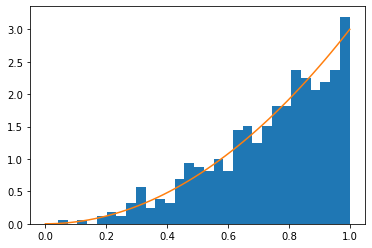

In [9]:
samples = [accept_reject(f, a, b, M, return_y=False) for _ in range(size)]
plt.hist(samples, bins=30, density=True)
xrng = np.linspace(a, b)
plt.plot(xrng, f(xrng))

**Peer review grading.** The output of the cell above should be similar to the output of the cell below.

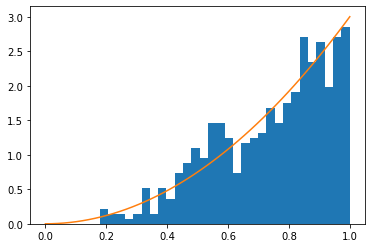

In [10]:
plt.hist([x for x, _ in samples_ref], bins=30, density=True)
xrng = np.linspace(a, b)
plt.plot(xrng, f(xrng))

Try different function $f$.

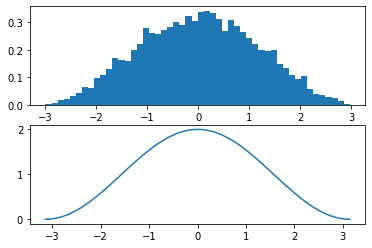

In [13]:
size = 10000
a = -np.pi
b = np.pi
M = 2

def f(x):
    return np.cos(x) + 1

samples = [accept_reject(f, a, b, M, return_y=False) for _ in range(size)]
plt.subplot(211)
plt.hist(samples, bins=50, density=True)
plt.subplot(212)
xrng = np.linspace(a, b)
plt.plot(xrng, f(xrng))

**Peer review grading.** The upper area should be similar to the lower curve.